In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime as dt

import pdb

In [24]:
selector = ['UCB', 'SGV_UCB', 'MUTUAL_INFO']
selector = ['SGV_UCB']
selectors = selector
directory = 'results/'
model = 'linear'
user = 'perfect'
fake_func = 'linear'
hyper = 'no'

colors_dict = {'SGV_UCB': '#000000',
               'UCB': '#F0E442',
               'ABS_UCB': '#CC79A7',
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#F0E442',
               'BAYES_INFO_GAIN_PROBIT': '#D55E00',
               'BAYES_INFO_GAIN_999': '#56B4E9',
               'ACQ_RHO': '#0072B2',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#332288',
               'ACQ_SP': '#117733',
               'ACQ_SPEAR': '#AA4499',
               'SW_ACQ_RHO': '#009E73',
               'SW_ACQ_LL': '#CC79A7',
               'SW_ACQ_EPIC': '#332288',
               'SW_ACQ_SP': '#117733',
               'SW_ACQ_SPEAR': '#AA4499',
               'ABS_ACQ_RHO': '#000000',
               'ABS_ACQ_LL': '#000000',
               'ABS_ACQ_EPIC': '#000000',
               'ABS_ACQ_SP': '#000000',
               'ABS_ACQ_SPEAR': '#000000'}


pap_colors_dict = {
               'SGV_UCB': '#000000',
               'UCB': '#000000',
               'ABS_UCB': '#000000',
               'MUTUAL_INFO': '#CC79A7',
               'RANDOM': '#56B4E9',
               'ABS_RANDOM': '#56B4E9',
               'BAYES_INFO_GAIN_PROBIT': '#D55E00',
               'BAYES_INFO_GAIN_999': '#56B4E9',
               'ACQ_RHO': '#0072B2',
               'ACQ_LL': '#E69F00',
               'ACQ_EPIC': '#332288',
               'ACQ_SP': '#117733',
               'ACQ_SPEAR': '#009E73',
               'SW_ACQ_RHO': '#0072B2',
               'SW_ACQ_LL': '#E69F00',
               'SW_ACQ_EPIC': '#332288',
               'SW_ACQ_SP': '#117733',
               'SW_ACQ_SPEAR': '#009E73',
               'ABS_ACQ_RHO': '#0072B2',
               'ABS_ACQ_LL': '#E69F00',
               'ABS_ACQ_EPIC': '#000000',
               'ABS_ACQ_SP': '#000000',
               'ABS_ACQ_SPEAR': '#009E73',
               'SW_UCB_RHO' : '#0072B2',
               'SW_UCB_LL' : '#E69F00',
               'SW_UCB_SPEAR' : '#009E73',
               'SW_FIXED_RHO' : '#0072B2',
               'SW_FIXED_LL' : '#E69F00',
               'SW_FIXED_SPEAR' : '#009E73',
               'SW_CHECK_RHO' : '#0072B2',
               'SW_CHECK_LL' : '#E69F00',
               'SW_CHECK_SPEAR' : '#009E73'
}

pap_style_sel = {
               'SGV_UCB': '-',
               'UCB': '--',
               'ABS_UCB': ':',
               'MUTUAL_INFO': '--',
               'RANDOM': '--',
               'ABS_RANDOM': ':',
               'BAYES_INFO_GAIN_PROBIT': '--',
               'BAYES_INFO_GAIN_999': '--',
               'ACQ_RHO': '--',
               'ACQ_LL': '--',
               'ACQ_EPIC': '--',
               'ACQ_SP': '--',
               'ACQ_SPEAR': '--',
               'SW_ACQ_RHO': '-',
               'SW_ACQ_LL': '-',
               'SW_ACQ_EPIC': '-',
               'SW_ACQ_SP': '-',
               'SW_ACQ_SPEAR': '-',
               'ABS_ACQ_RHO': ':',
               'ABS_ACQ_LL': ':',
               'ABS_ACQ_EPIC': ':',
               'ABS_ACQ_SP': ':',
               'ABS_ACQ_SPEAR': ':',
               'SW_UCB_RHO' : 'dashdot',
               'SW_UCB_LL' : 'dashdot',
               'SW_UCB_SPEAR' : 'dashdot',
               'SW_FIXED_RHO' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_FIXED_LL' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_FIXED_SPEAR' : (0, (3, 1, 3, 1, 5, 5)),
               'SW_CHECK_RHO' : (0, (7, 2, 2, 2, 7, 2)),
               'SW_CHECK_LL' : (0, (7, 2, 2, 2, 7, 2)),
               'SW_CHECK_SPEAR' : (0, (7, 2, 2, 2, 7, 2))
}



colors2_dict = {'ACQ_RHO': '#000000',
                'SW_ACQ_RHO': '#D55E00',
                'ABS_UCB': '#F0E442',}

sig_color_dict = {'0.1': '#000000',
                  '0.2': '#009E73',
                  '0.5': '#CC79A7',
                  '1.0': '#0072B2', 
                  '10.0':'#D55E00'}


alpha_color_dict = {'0.01': '#E69F00',
                    '0.1': '#56B4E9',
                    '0.25': '#009E73',
                    '0.5': '#000000',
                    '0.75': '#F0E442',
                    '0.9': '#0072B2',
                    '0.99': '#CC79A7'
                   }
v_style_dict = {'10.0': '-',
                '60.0': '--',
                '80.0': '--',
                '160.0': ':',
                '2000.0' : '-.',
                '50000.0': (0, (7, 7, 7, 7, 7, 7))}


#'-','--',':','-.'
sel_style_dict = {'ABS_UCB': '-',
                'SW_UCB_RHO': '--',
                'SW_UCB_SPEAR': ':',
                'SW_UCB_LL' : '-.',
                'ACQ_SPEAR': (0, (7, 7, 7, 7, 7, 7))}

#sig_style_dict = {'0.1': '-',
#                '1.0': '--',
#                '10.0': ':'}

rbf_style_dict = {  '0.1': (0, (3, 1, 3, 1, 5, 5)),
                    '0.4': ':',
                    '0.6': (0, (5, 1, 5, 1, 1, 1)),
                    '0.8': '-.',
                    '1.0': (0, (3, 1, 1, 1, 1, 1)),
                    '1.2': '--',
                    '1.5': '-',
                    '10.0': (0, (7, 7, 7, 7, 7, 7))}

sig_style_dict = {  '0.1': '--',
                    '0.5': '-',
                    '1.0': ':', 
                    '1.5': '-.',
                    '2.0': (0, (3, 1, 1, 1, 1, 1)),
                    '5.0': (0, (7,7,7,7,7,7)),
                    '10.0': (0, (3, 1, 3, 1, 5, 5))}

kmed_style_dict = {'True': '--',
                    'False': '-',
                    'uni': ':', 
                    'downhull': '-.',
                    'medrand': (0, (3, 1, 1, 1, 1, 1))}

model_style_dict = {'gp': '-',
                    'linear': '--'}




def selector_text_f(selector):
    selector_text = ''
    if selector == 'SGV_UCB':
        selector_text = 'SGV-UCB'
    elif selector == 'UCB':
        selector_text = 'Pair UCB'
    elif selector == 'ABS_UCB':
        selector_text = 'Abs. UCB'
    elif selector == 'MUTUAL_INFO':
        selector_text = 'Pair Mutual Information'
    elif selector == 'RANDOM':
        selector_text = 'Pair Random'
    elif selector == 'ABS_RANDOM':
        selector_text = 'Abs. Random'
    elif selector == 'BAYES_INFO_GAIN_PROBIT':
        selector_text = 'Reward Optimization'
    elif selector == 'ACQ_RHO':
        selector_text = 'Pair  Acq.-rho'
    elif selector == 'SW_ACQ_RHO':
        selector_text = 'Mix. Acq.-rho'
    elif selector == 'SW_UCB_RHO':
        selector_text = 'Mix. UCB-RHO'
    elif selector == 'SW_FIXED_RHO':
        selector_text = 'Mix. Fixed time Switch UCB-RHO'
    elif selector == 'ABS_ACQ_RHO':
        selector_text = 'Abs. acquisition-rho'
    elif selector == 'SW_CHECK_RHO':
        selector_text = 'Chk. Acq.-rho'
    elif selector == 'SW_ACQ_LL':
        selector_text = 'Mix. acquitition-ll'
    elif selector == 'SW_UCB_LL':
        selector_text = 'Mix. UCB-LL'
    elif selector == 'SW_FIXED_LL':
        selector_text = 'Mix. Fixed time Switch UCB-LL'
    elif selector == 'ACQ_LL':
        selector_text = 'Pair Acquisition loglikelihood'
    elif selector == 'ABS_ACQ_LL':
        selector_text = 'Abs. Acquisition-ll'
    elif selector == 'SW_CHECK_LL':
        selector_text = 'Chk. Acq.-LL'
    elif selector == 'ACQ_EPIC' or selector == 'SW_ACQ_EPIC':
        selector_text = 'Acquisition EPICish'
    elif selector == 'ACQ_SP':
        selector_text = 'Acquisition Spearman old'
    elif selector == 'ACQ_SPEAR':
        selector_text = 'Pair Acquisition Spearman'
    elif selector == 'SW_ACQ_SPEAR':
        selector_text = 'Mix. Acquisition Spearman'
    elif selector == 'SW_UCB_SPEAR':
        selector_text = 'Mix. UCB-Spearman'
    elif selector == 'ABS_ACQ_SPEAR':
        selector_text = 'Abs. Acquisition Spearman'
    elif selector == 'SW_CHECK_SPEAR':
        selector_text = 'Chk. Acq.-Spearman'
    elif selector == 'SW_FIXED_SPEAR':
        selector_text = 'Mix. Fixed time Switch UCB-SPEAR'
    else:
        print('Unknown selector: ' + selector)
    
    return selector_text


In [25]:
def filter_by_time(names, after=None, before=None):
    fmt_str = '%Y-%m-%d_%H-%M-%S'
    
    if after is not None:
        after_d = dt.strptime(after, fmt_str)
        
        if before is not None:
            # only keep values between before and after
            
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d and dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # only keep values after
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) > after_d]
    else:
        if before is not None:
            # only keep names before
            before_d = dt.strptime(before, fmt_str)
            filtered = [n for n in names if dt.strptime(n[-34:-15], fmt_str) < before_d]
        else:
            # just return everything
            filtered = names
    return filtered
        
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], '2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47'))
print(filter_by_time(['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz'], before='2024-08-07_00-25-47', after='2024-07-07_00-25-47'))

['asdagads-adsfa-dsf-adsfa-awfe-2024-08-09_13-22-45/train_data.npz']
[]
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']
['asdagads-adsfa-dsf-adsfa-awfe-2024-08-06_13-22-45/train_data.npz']


	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env1_2024-10-04_16-15-30/train_data.npz
results/AT_UCB_model_g

results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env8_2024-10-12_14-55-53/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env2_2024-10-12_14-55-52/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env7_2024-10-12_14-55-52/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env3_2024-10-12_14-55-52/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_me

results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env6_2024-10-12_06-35-56/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env4_2024-10-12_06-35-56/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env9_2024-10-12_06-35-57/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env5_2024-10-12_06-35-56/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medran

results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env7_2024-10-12_03-57-45/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env4_2024-10-12_03-57-45/train_data.npz
(500, 21)
standard diffs shape: (500, 21)
(21,)
	results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env5_2024-10-12_07-54-34/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_min_pareto_F

	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_UCB_model_gp_rating_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env1_2024-10-04_16-15-30/train_data.npz
results/AT_UCB_model_g

	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env7_2024-10-04_20-21-05/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_min_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env2_2024-10-04_20-21-05/train_da

results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env0_2024-10-13_19-30-56/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env3_2024-10-13_19-30-55/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env8_2024-10-13_19-30-56/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env7_2024-10-13_19-30-56/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_paret

results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env8_2024-10-12_21-59-29/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env1_2024-10-12_21-59-29/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env4_2024-10-12_21-59-28/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env7_2024-10-12_21-59-29/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_Fa

	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.99_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
['Abs. UCB alpha=0.5', 'Mix. UCB-RHO alpha=0.01', 'Mix. UCB-RHO alpha=0.1', 'Mix. UCB-RHO alpha=0.25', 'Mix. UCB-RHO alpha=0.5', 'Mix. UCB-RHO alpha=0.75', 'Mix. UCB-RHO alpha=0.9', 'Mix. UCB-RHO alpha=0.99', 'Pair Acquisition Spearman alpha=0.5']
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_s

results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env8_2024-10-12_21-59-29/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env1_2024-10-12_21-59-29/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env4_2024-10-12_21-59-28/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.9_rbfl_1.2_rbfsig_1.0_env7_2024-10-12_21-59-29/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_logistic_pareto_Fa

results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env9_2024-10-12_18-56-13/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env8_2024-10-12_18-56-13/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env6_2024-10-12_18-56-13/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env0_2024-10-12_18-56-13/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_logi

results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env2_2024-10-13_13-26-25/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env6_2024-10-13_13-26-25/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env8_2024-10-13_13-26-25/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env0_2024-10-13_13-26-25/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_logistic_pareto_False_k

	results/AT_UCB_model_gp_rating_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.01_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_UCB_model_gp_rating_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_UCB_model_gp_rating_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env5_2024-10-05_05-44-19/train_data.npz
results

	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env5_2024-10-05_09-48-09/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env3_2024-10-05_09-48-09/train_data.npz
results/AT_ACQ_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_no_v_60.0_sigabs_1.0_sigpair_0.1_rbfl_1.2_rbfsig_1.0_env2_2024-10-05_09

results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env1_2024-10-14_14-02-58/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env4_2024-10-14_14-02-58/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env3_2024-10-14_14-02-57/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.25_rbfl_1.2_rbfsig_1.0_env5_2024-10-14_14-02-57/train_data.npz
results/AT_SW_UCB_RHO_model_gp_switch_user_human_choice2_fake_linear_pareto_False_km

standard diffs shape: (239, 21)
(21,)
	results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.5_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
	results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env0_2024-10-14_01-05-28/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env8_2024-10-14_01-05-27/train_data.npz
results/AT_SW_UCB_SPEAR_model_gp_switch_user_human_choice2_fake_linear_pareto

	results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env*/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env6_2024-10-14_02-42-19/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env1_2024-10-14_02-42-18/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pabs_0.95_falp_0.5_no_v_60.0_sigabs_1.0_sigpair_0.1_alpha_0.75_rbfl_1.2_rbfsig_1.0_env9_2024-10-14_02-42-19/train_data.npz
results/AT_SW_UCB_LL_model_gp_switch_user_human_choice2_fake_linear_pareto_False_kmed_medrand_ppair_0.95_pa

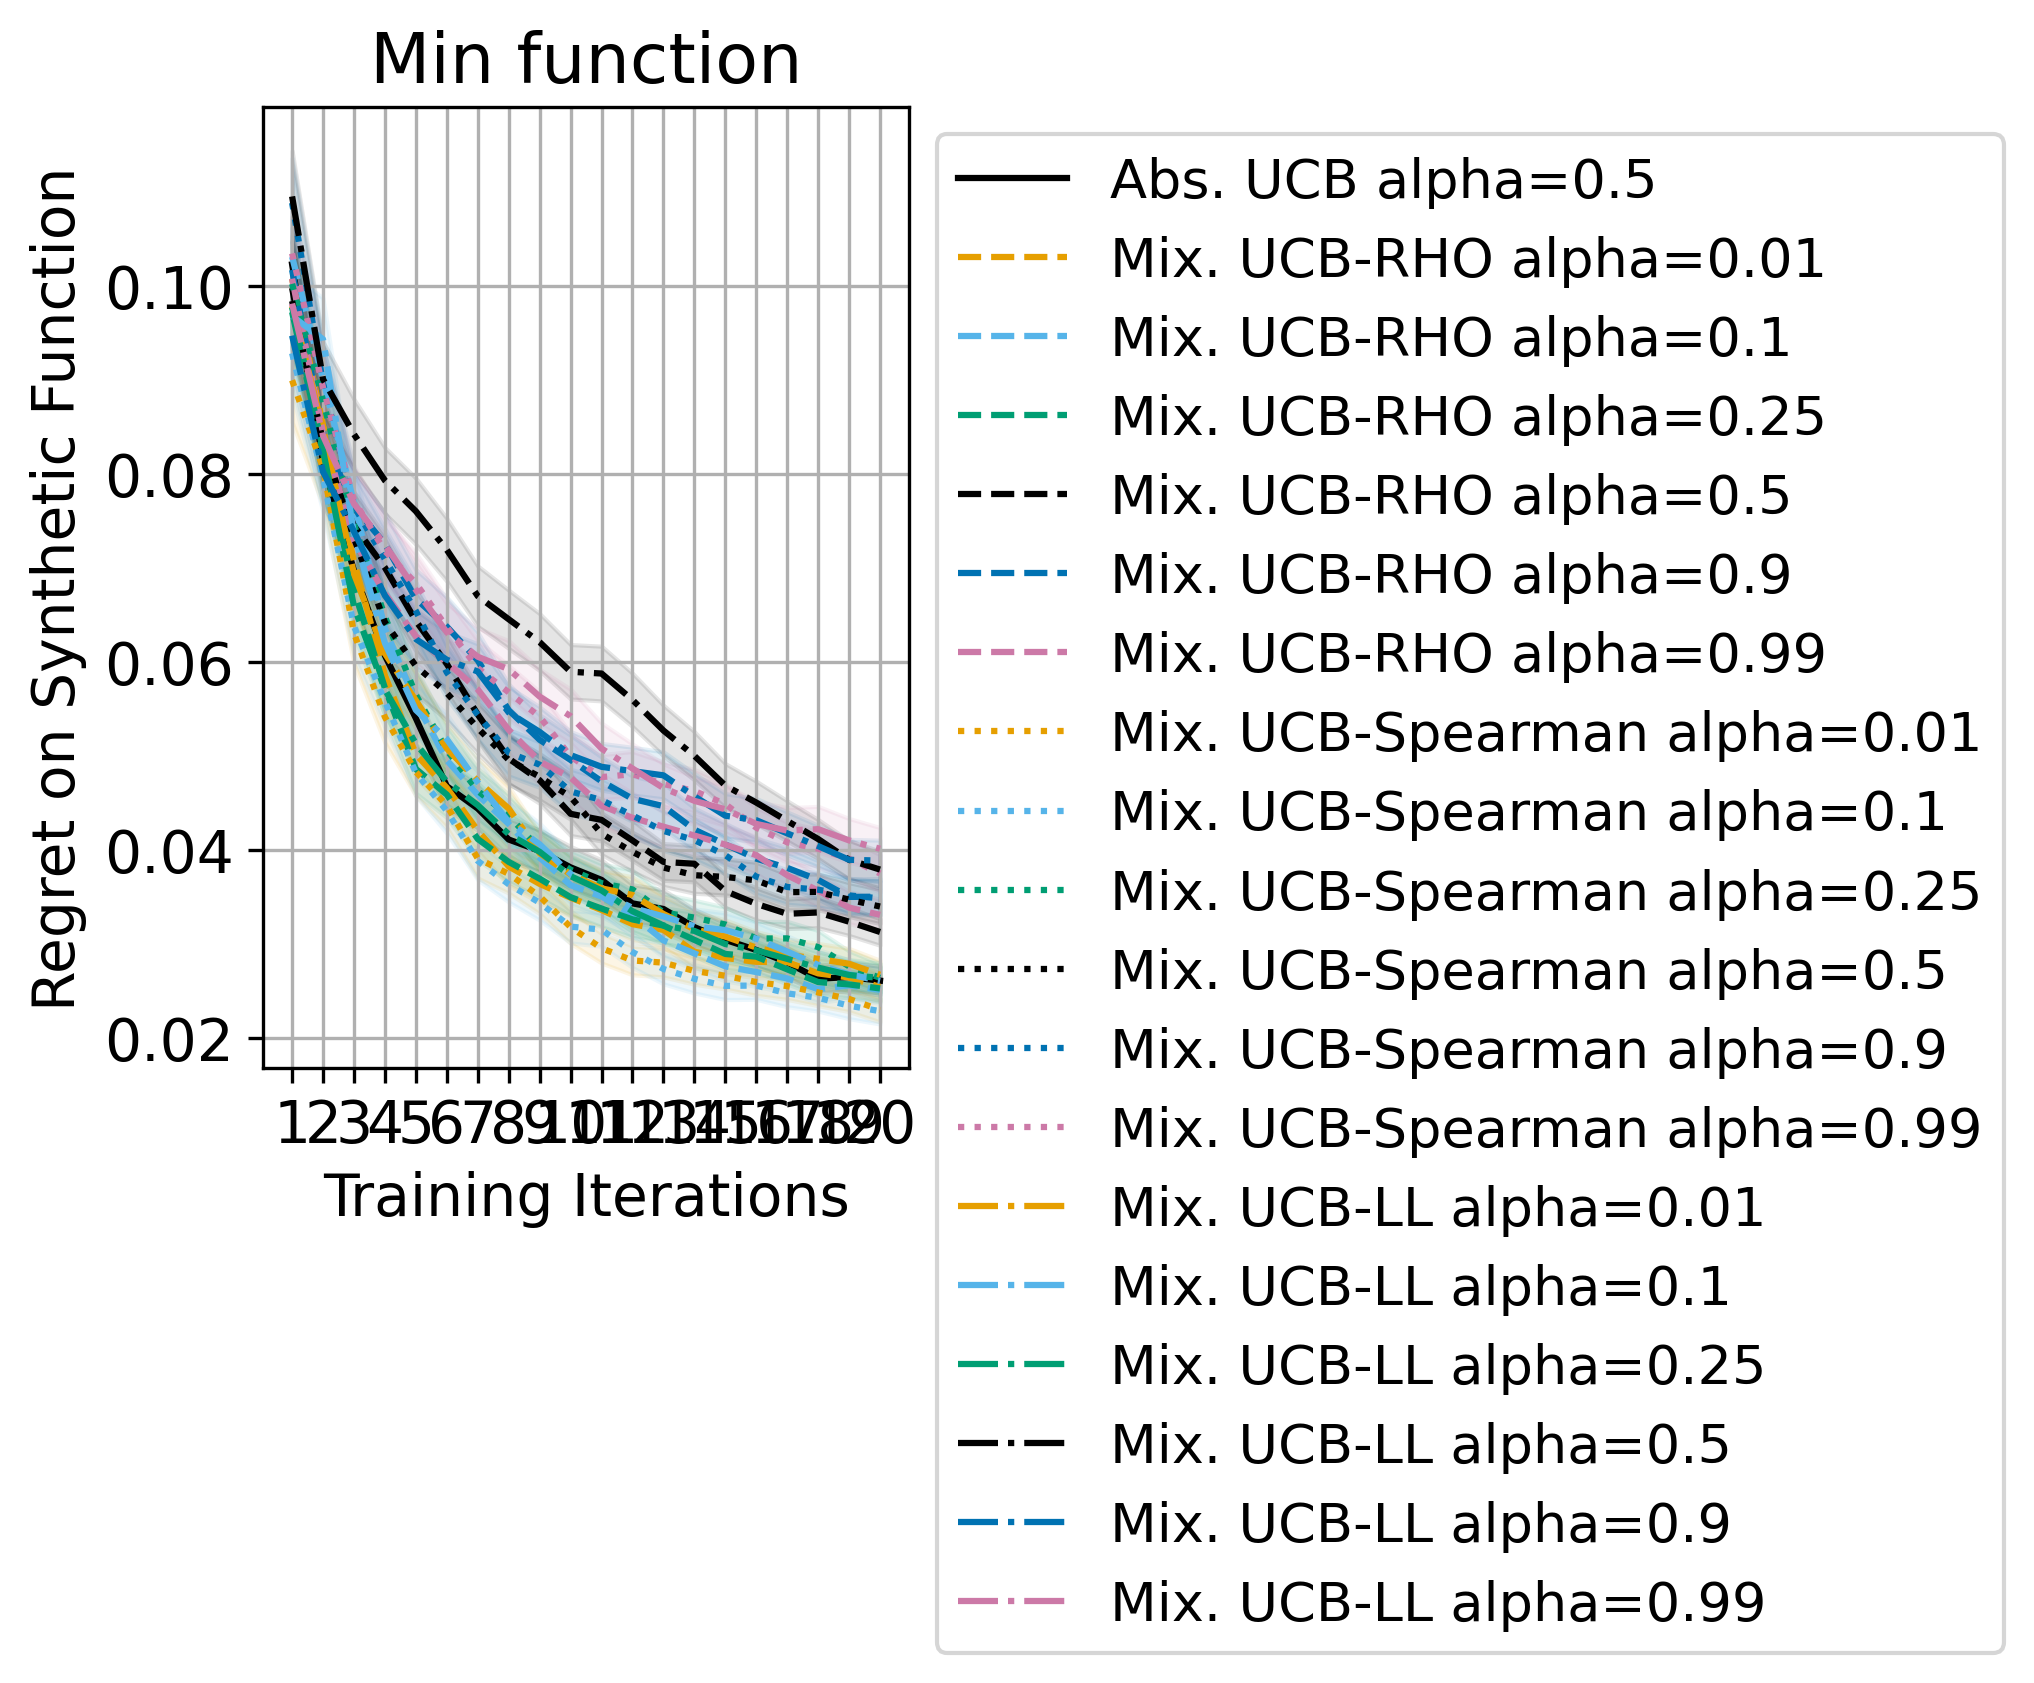

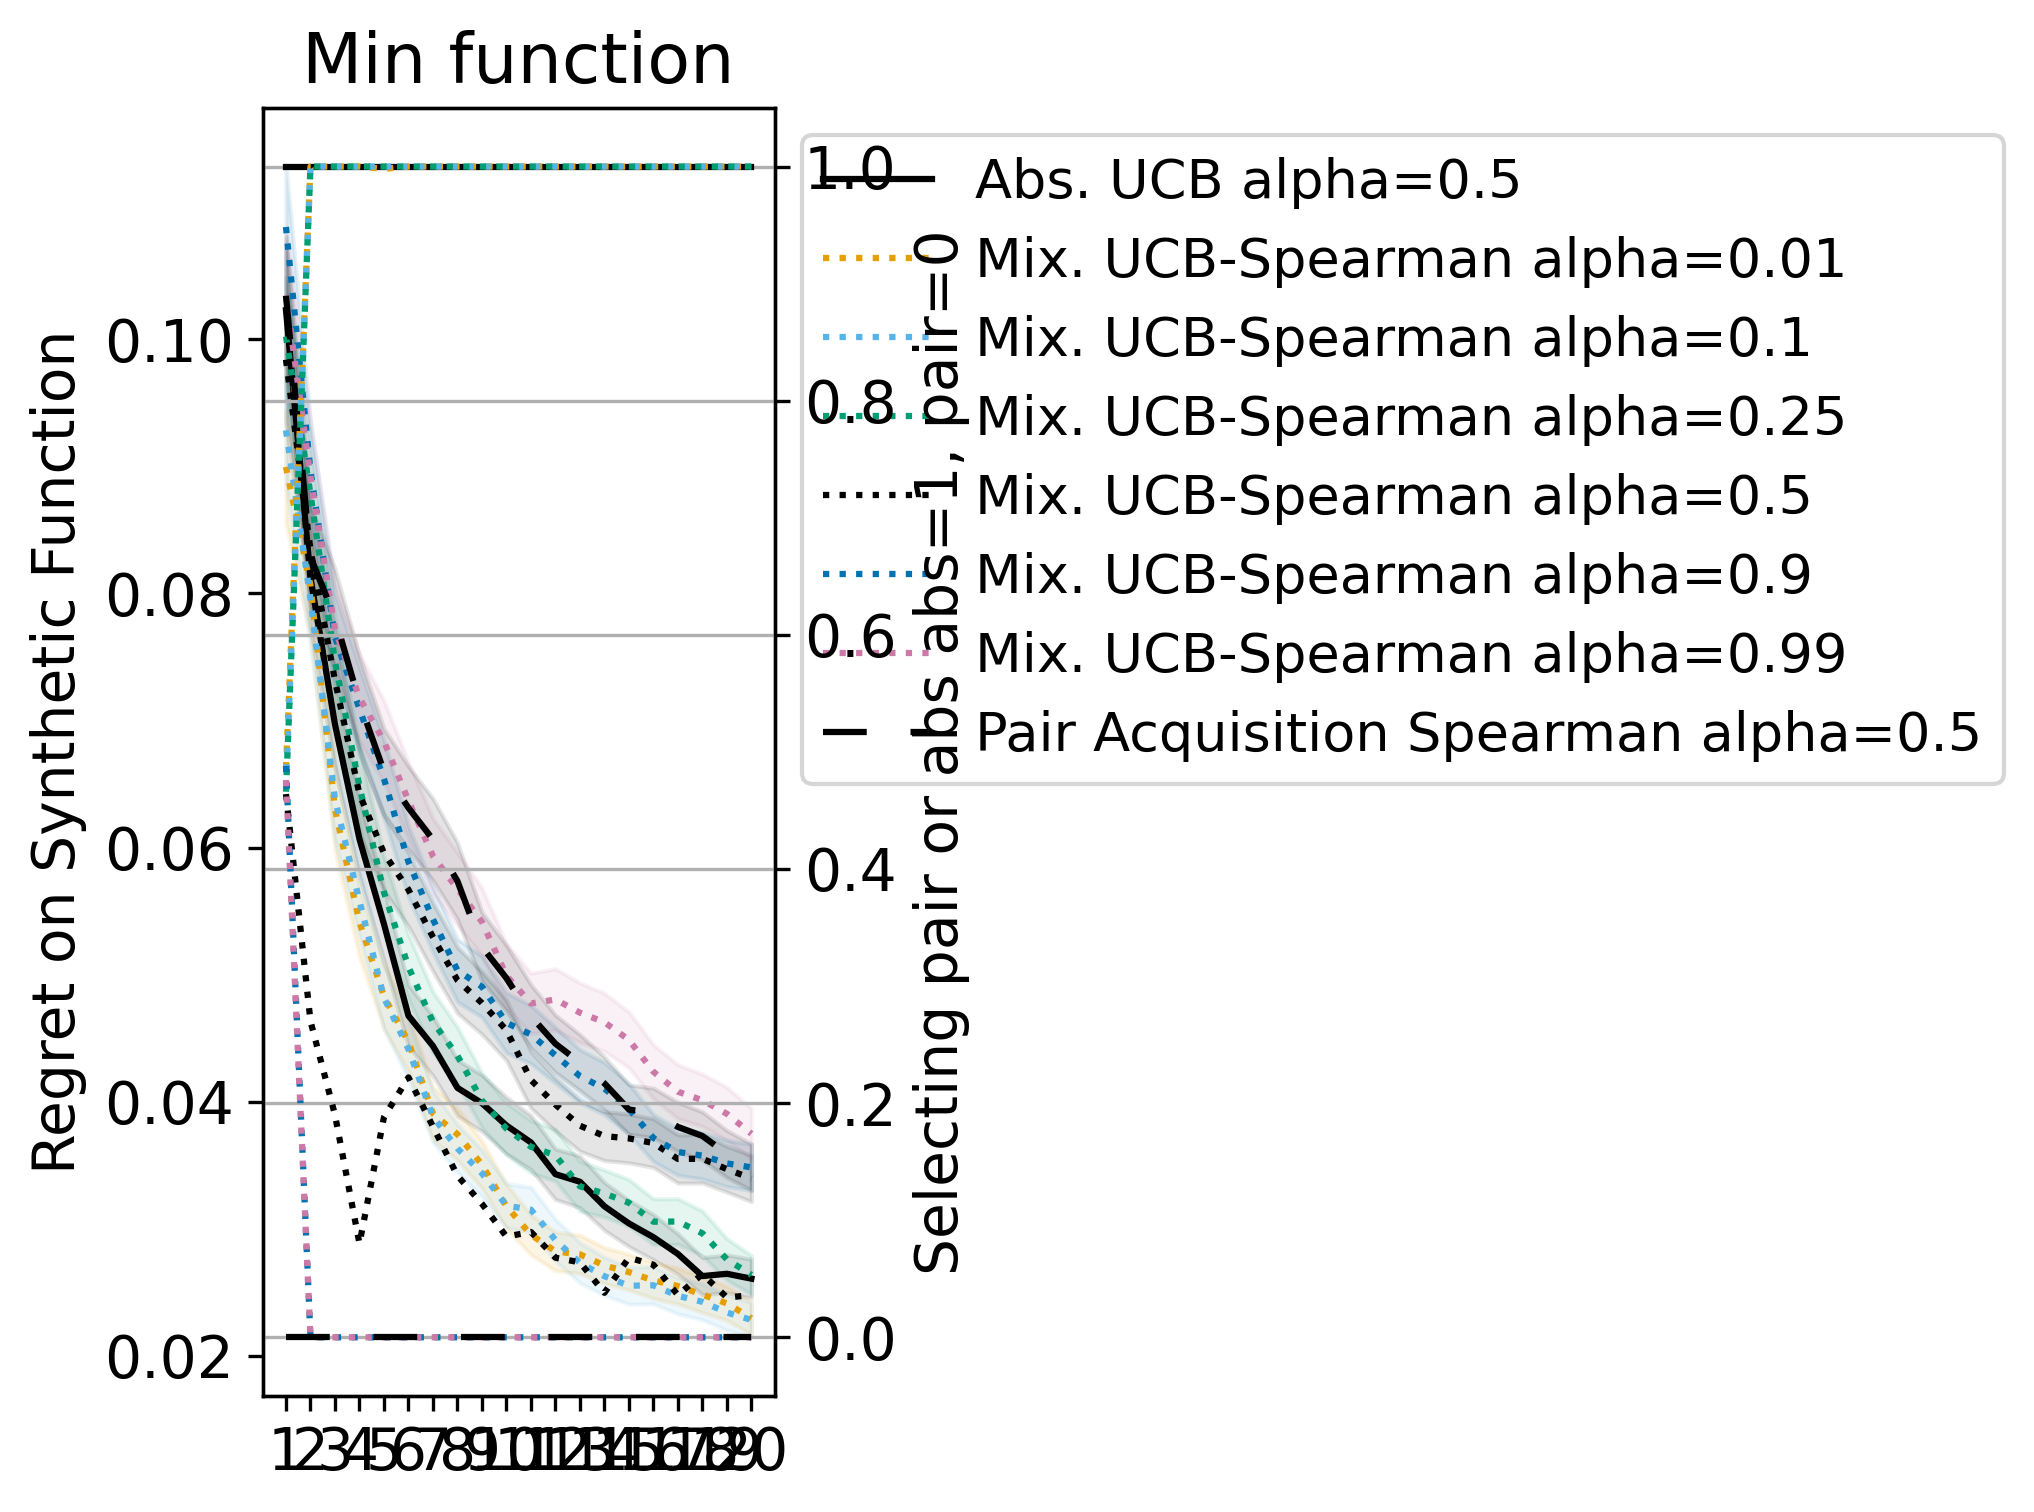

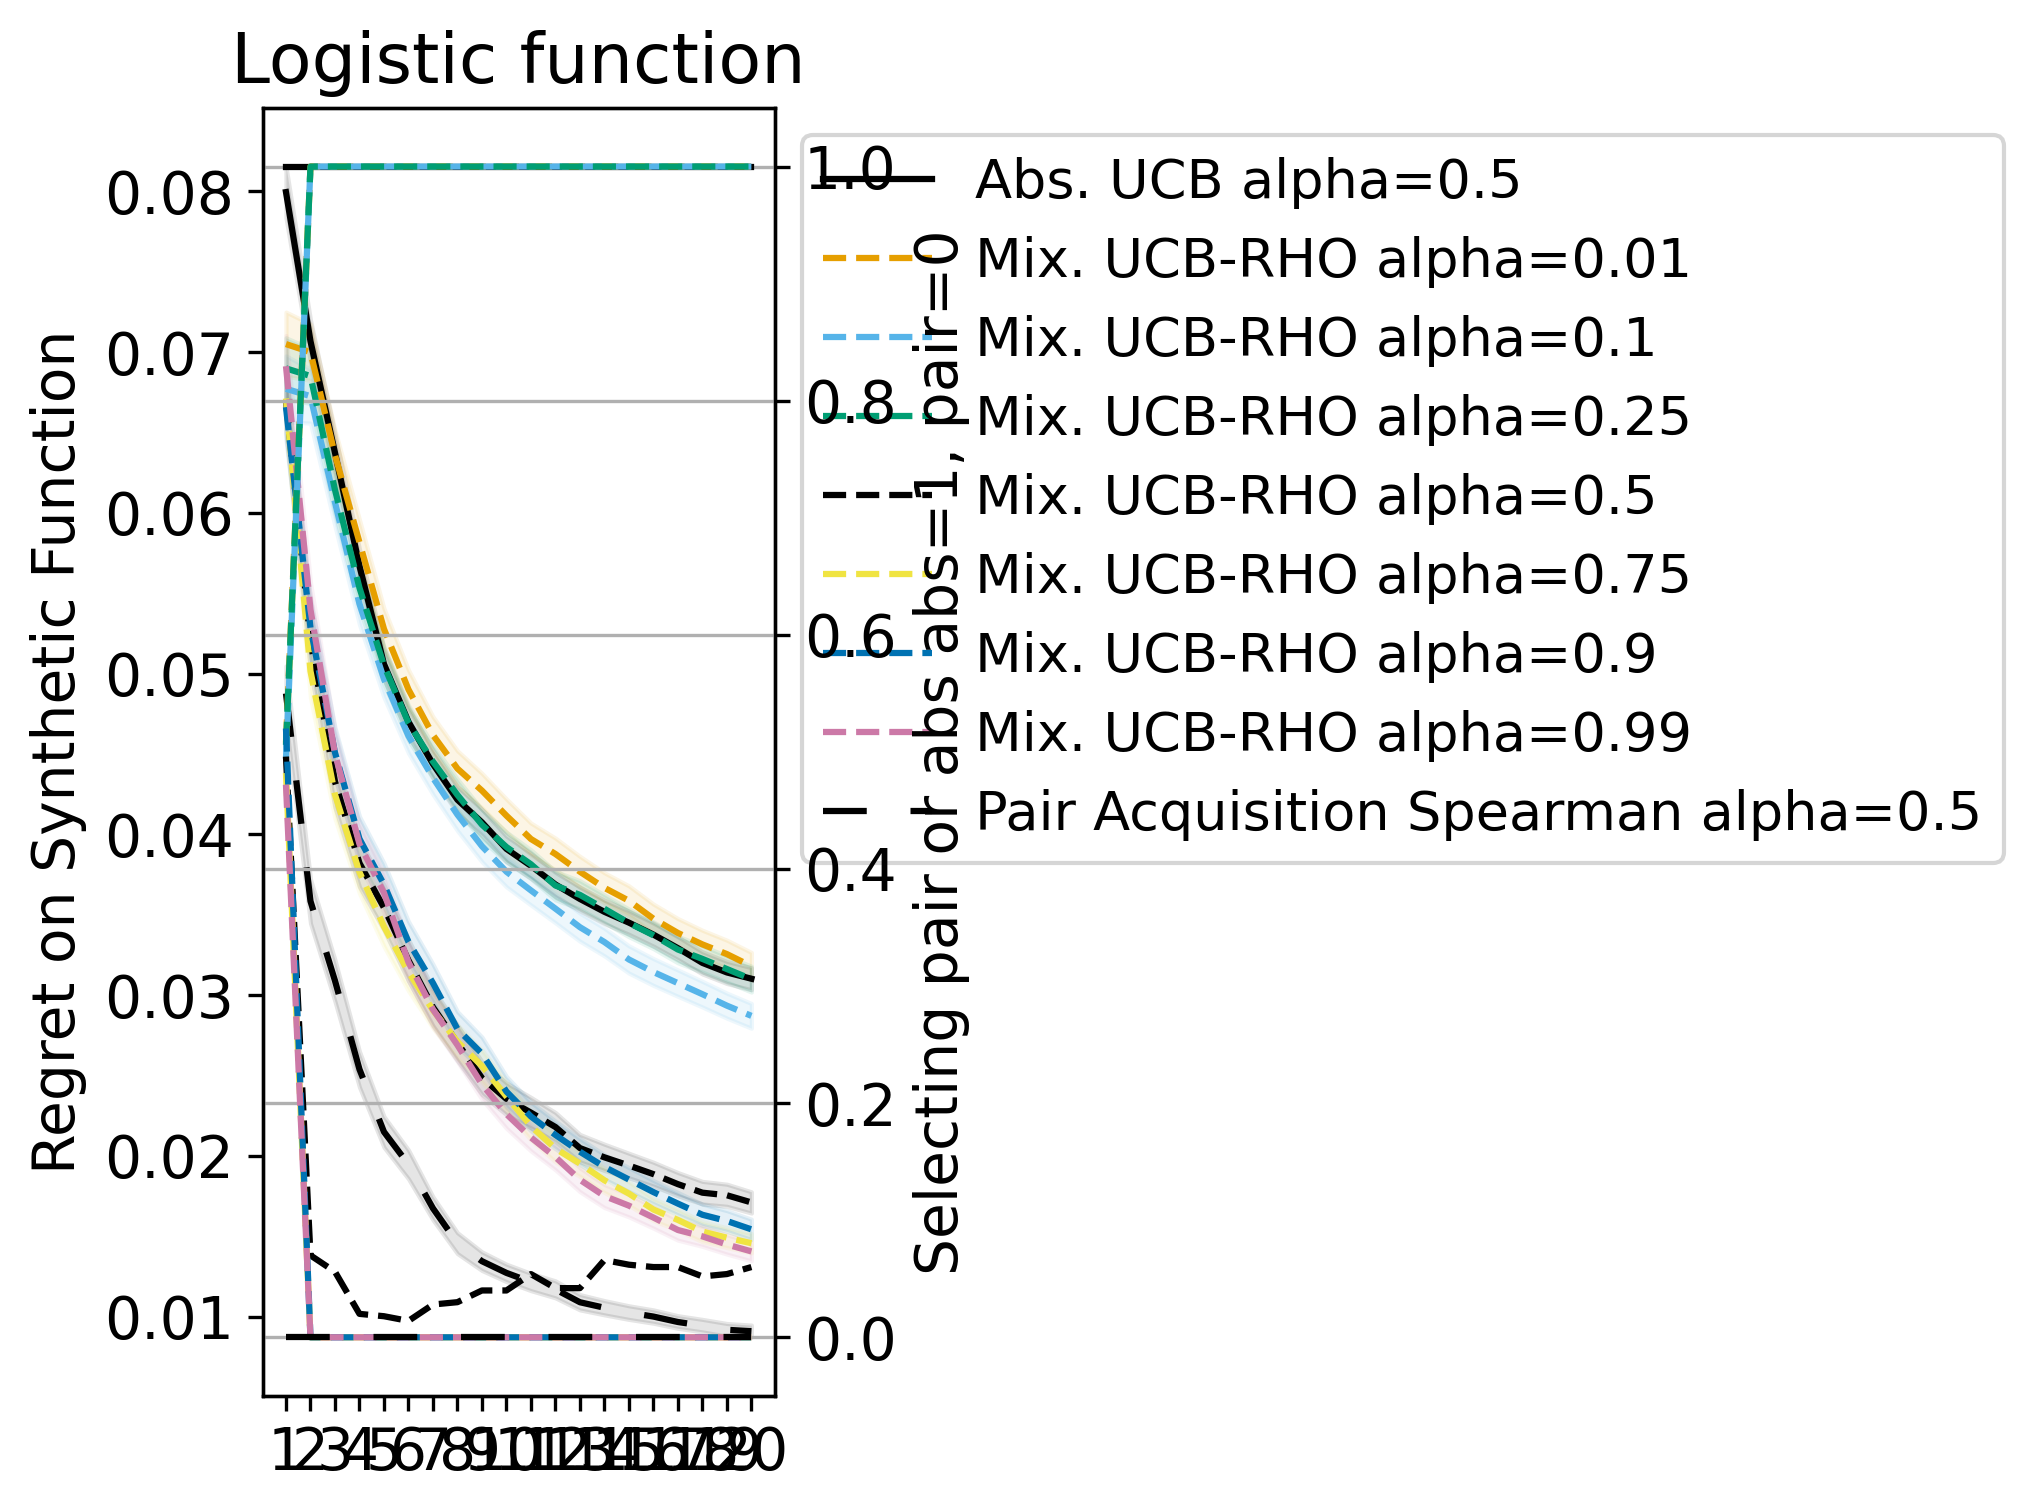

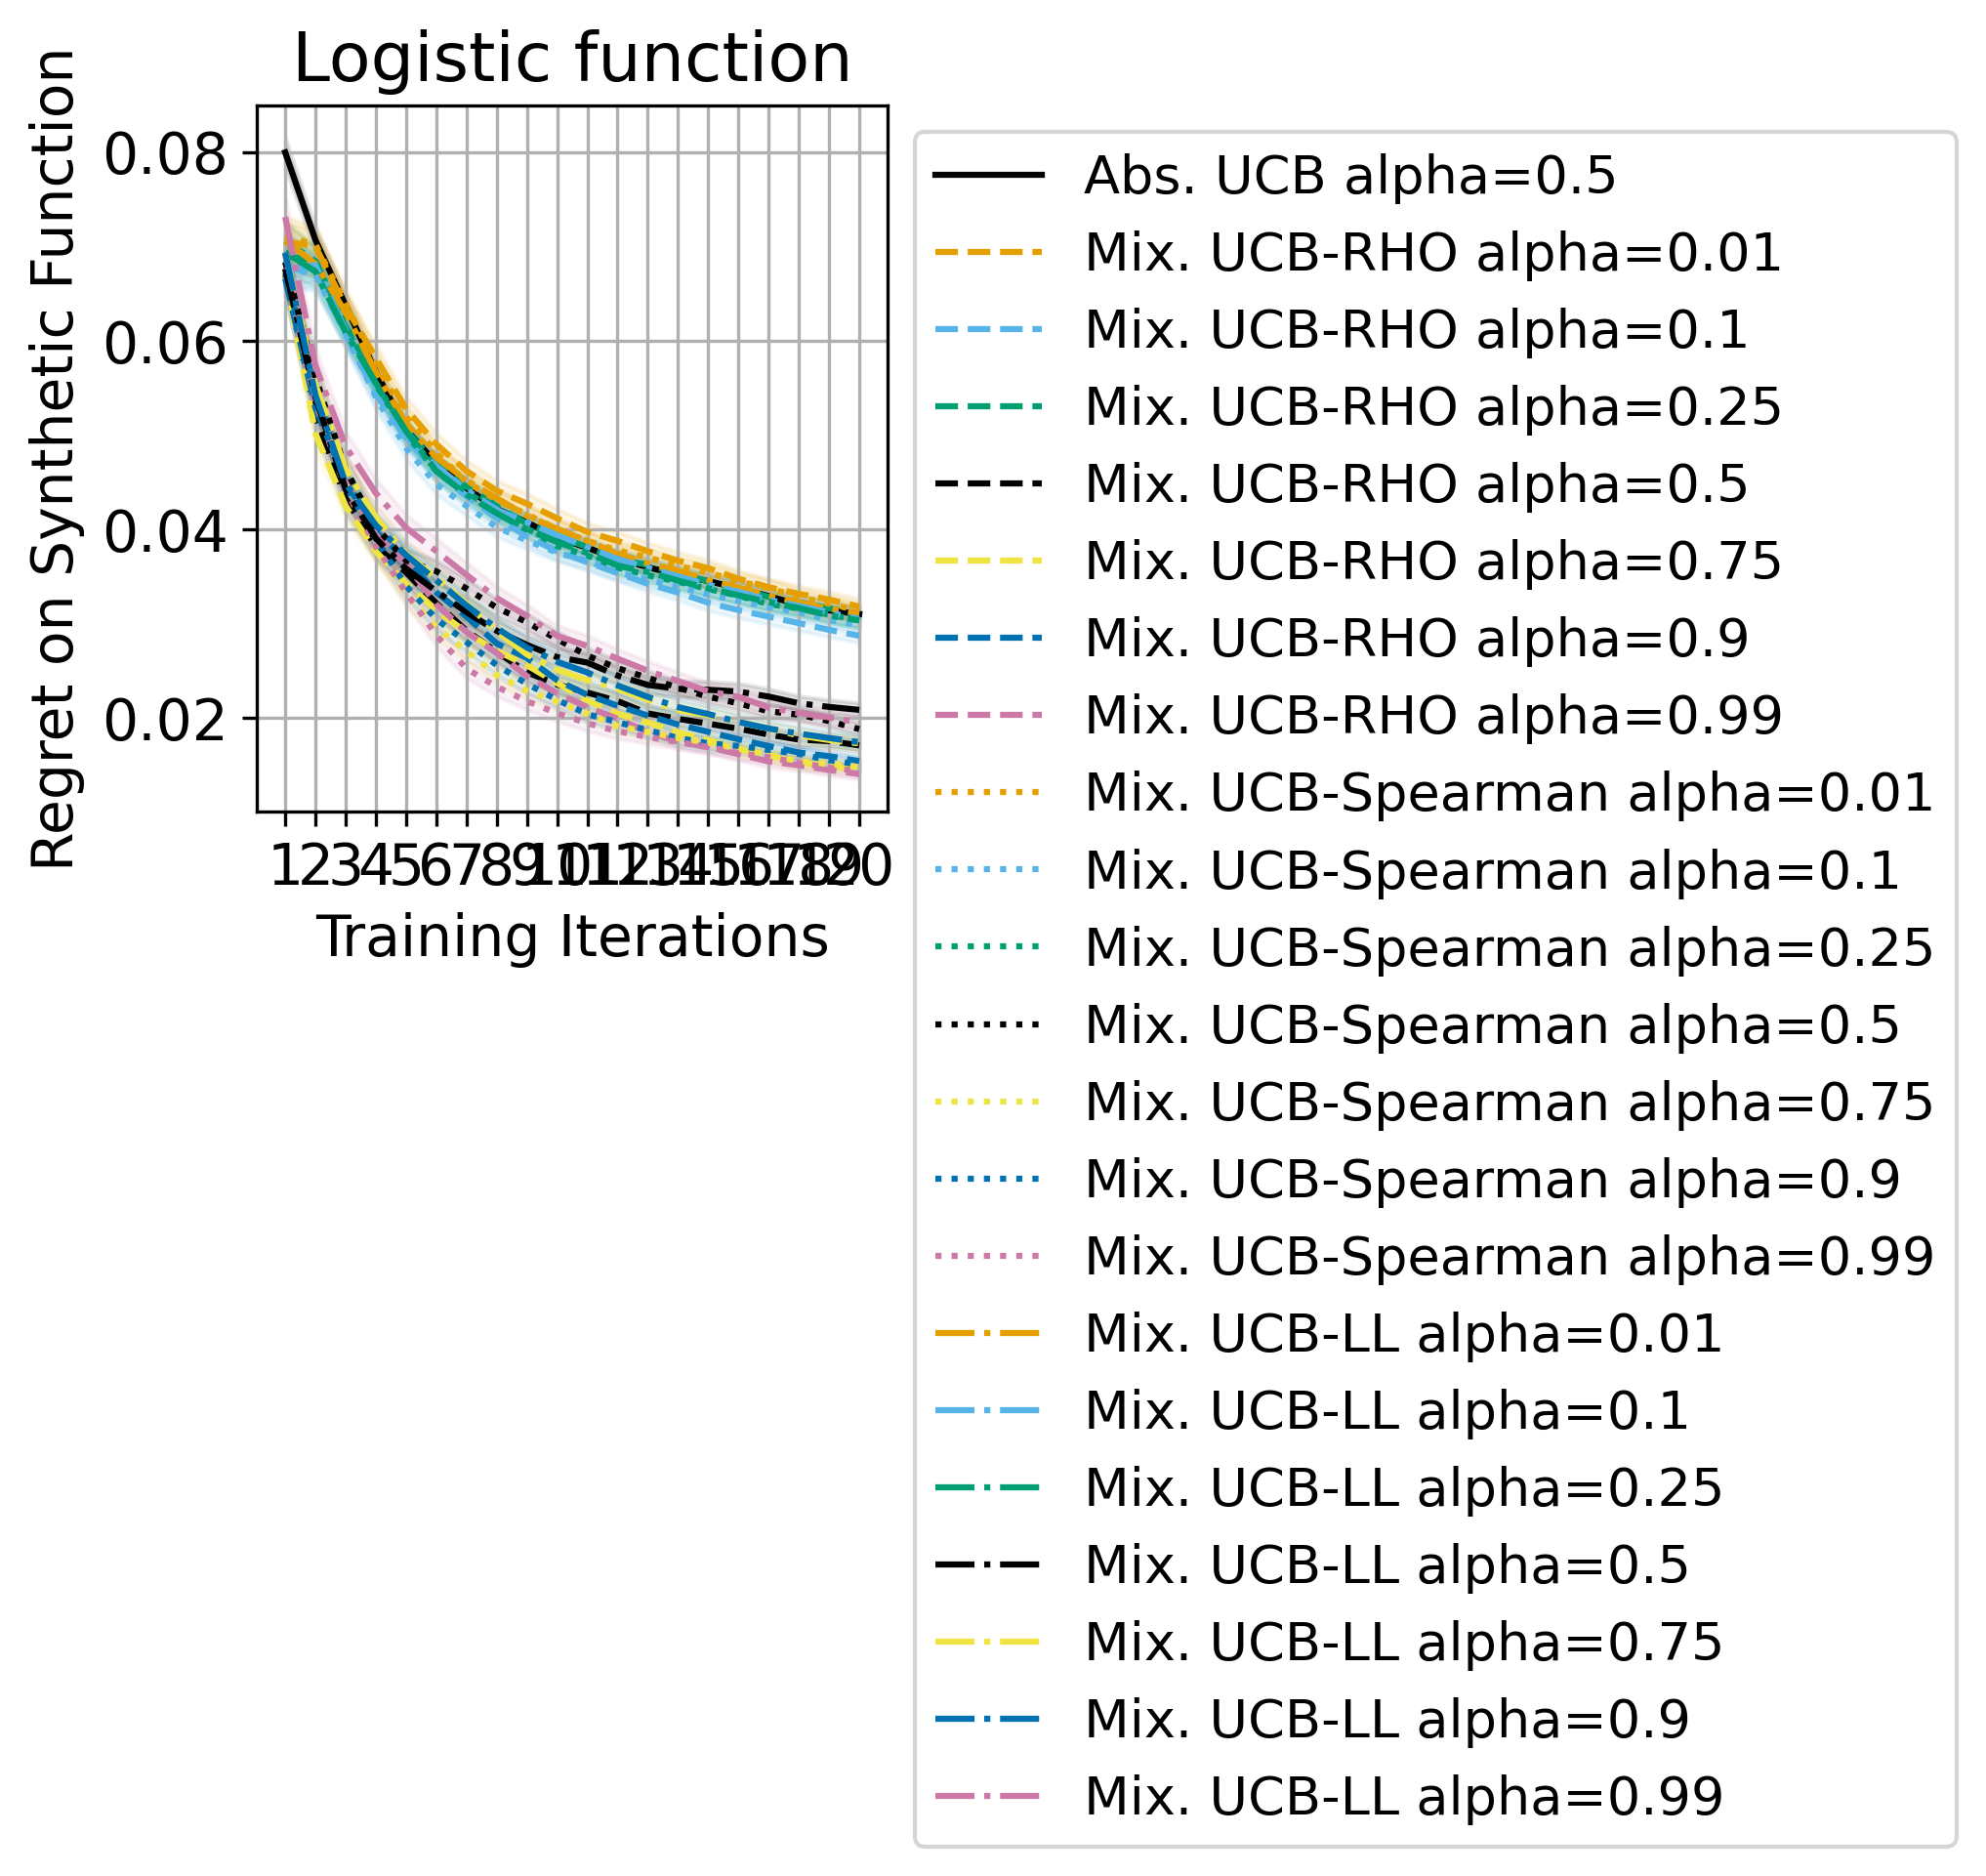

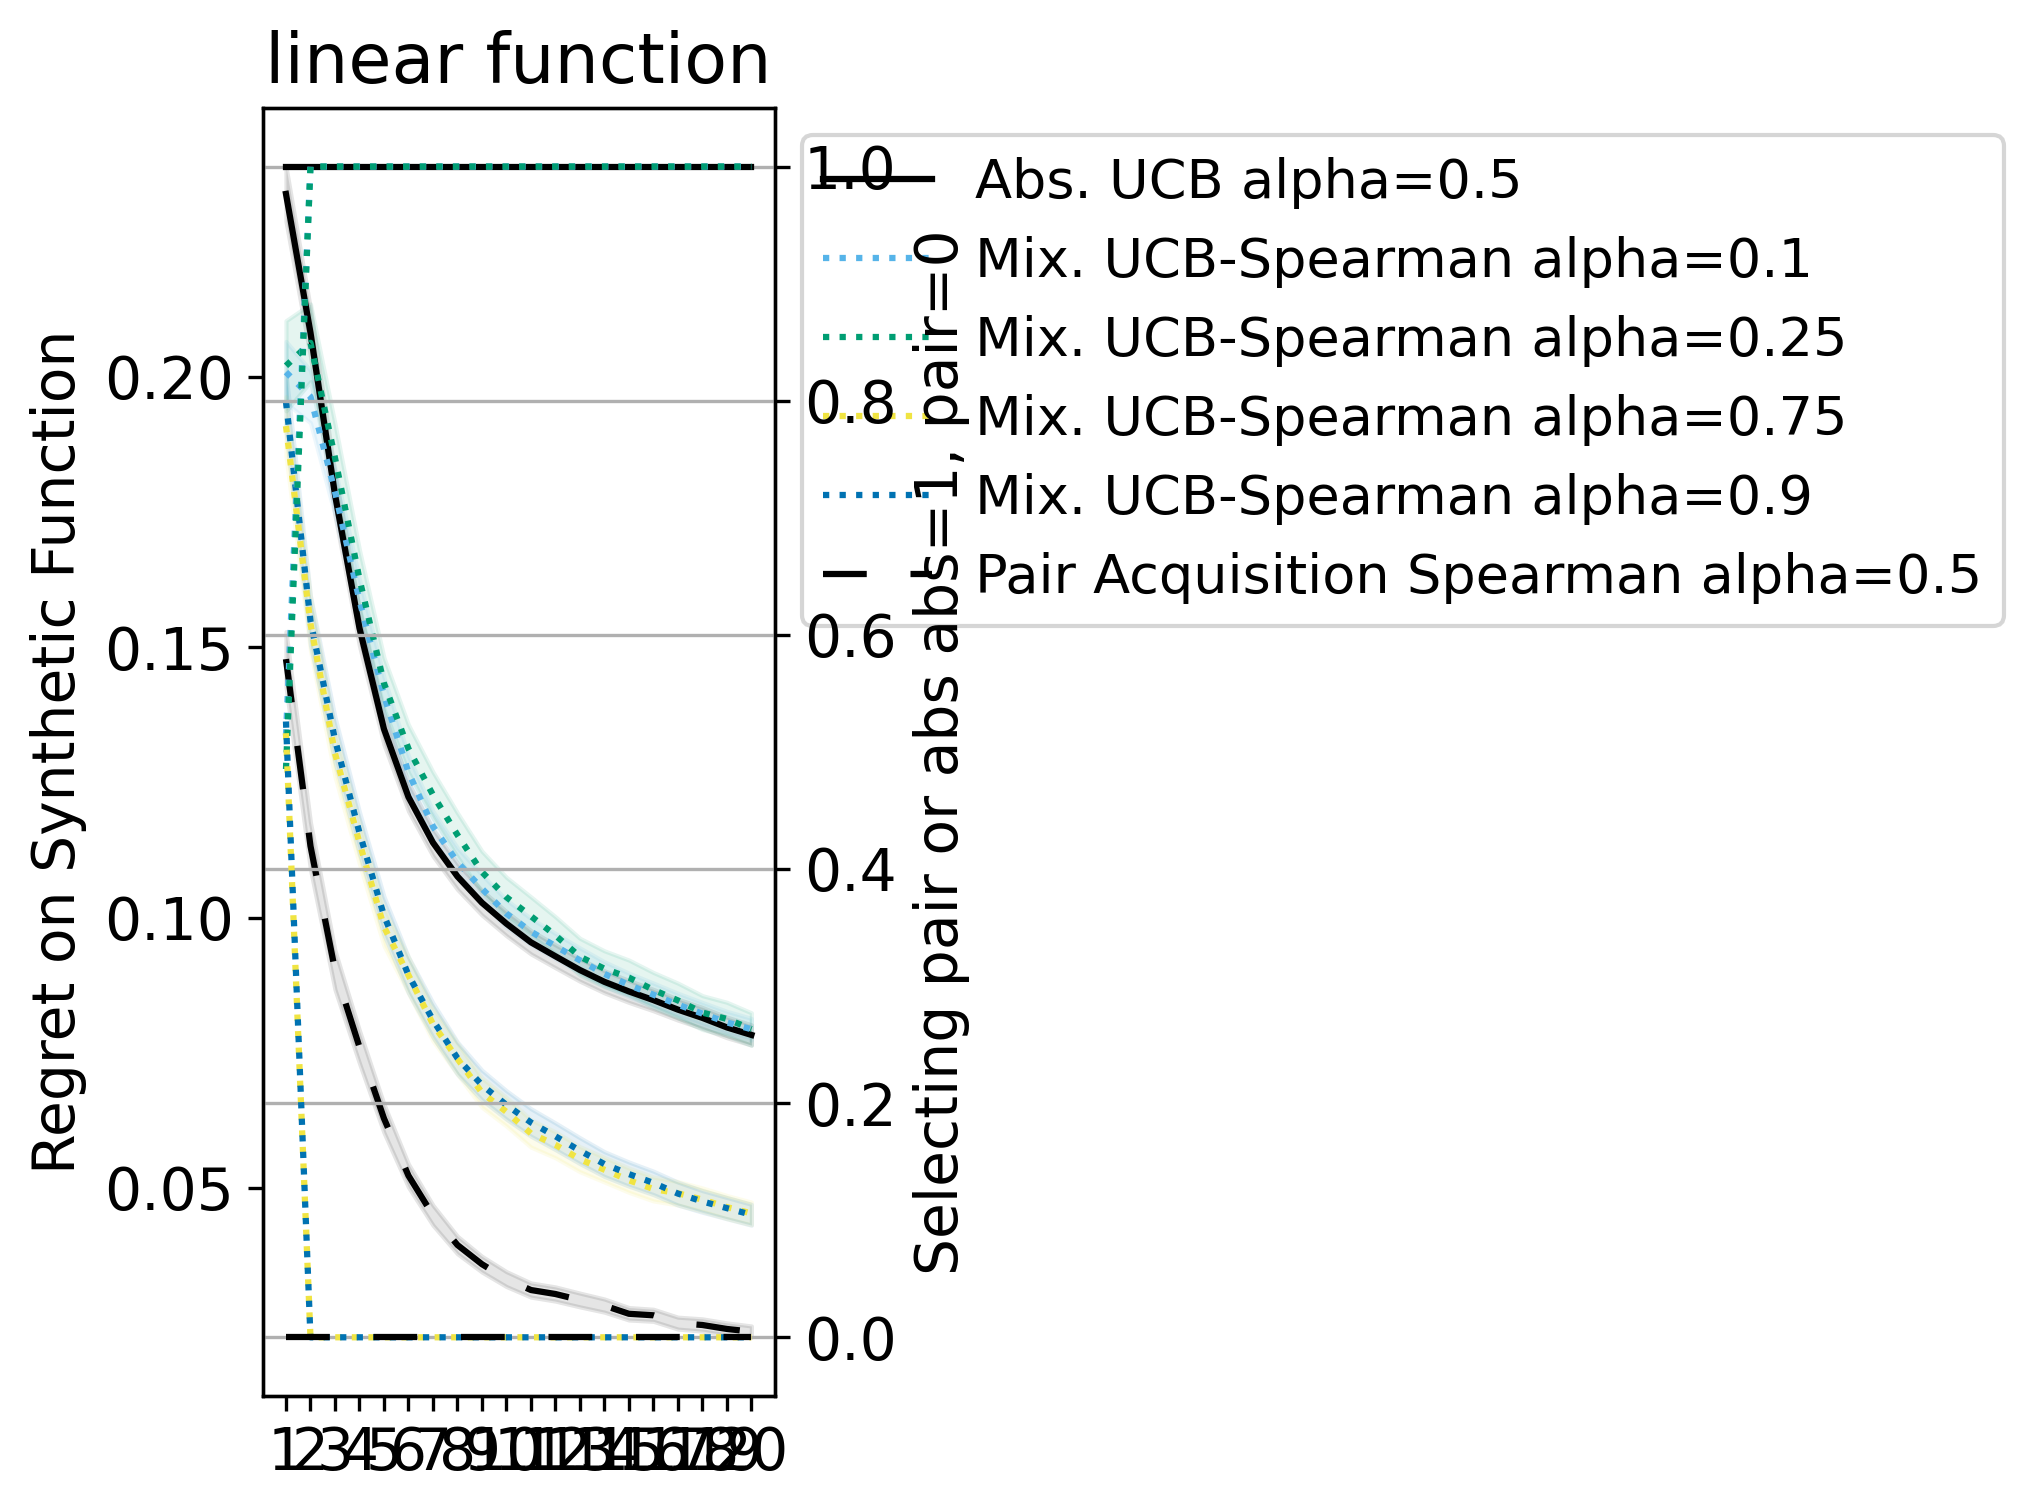

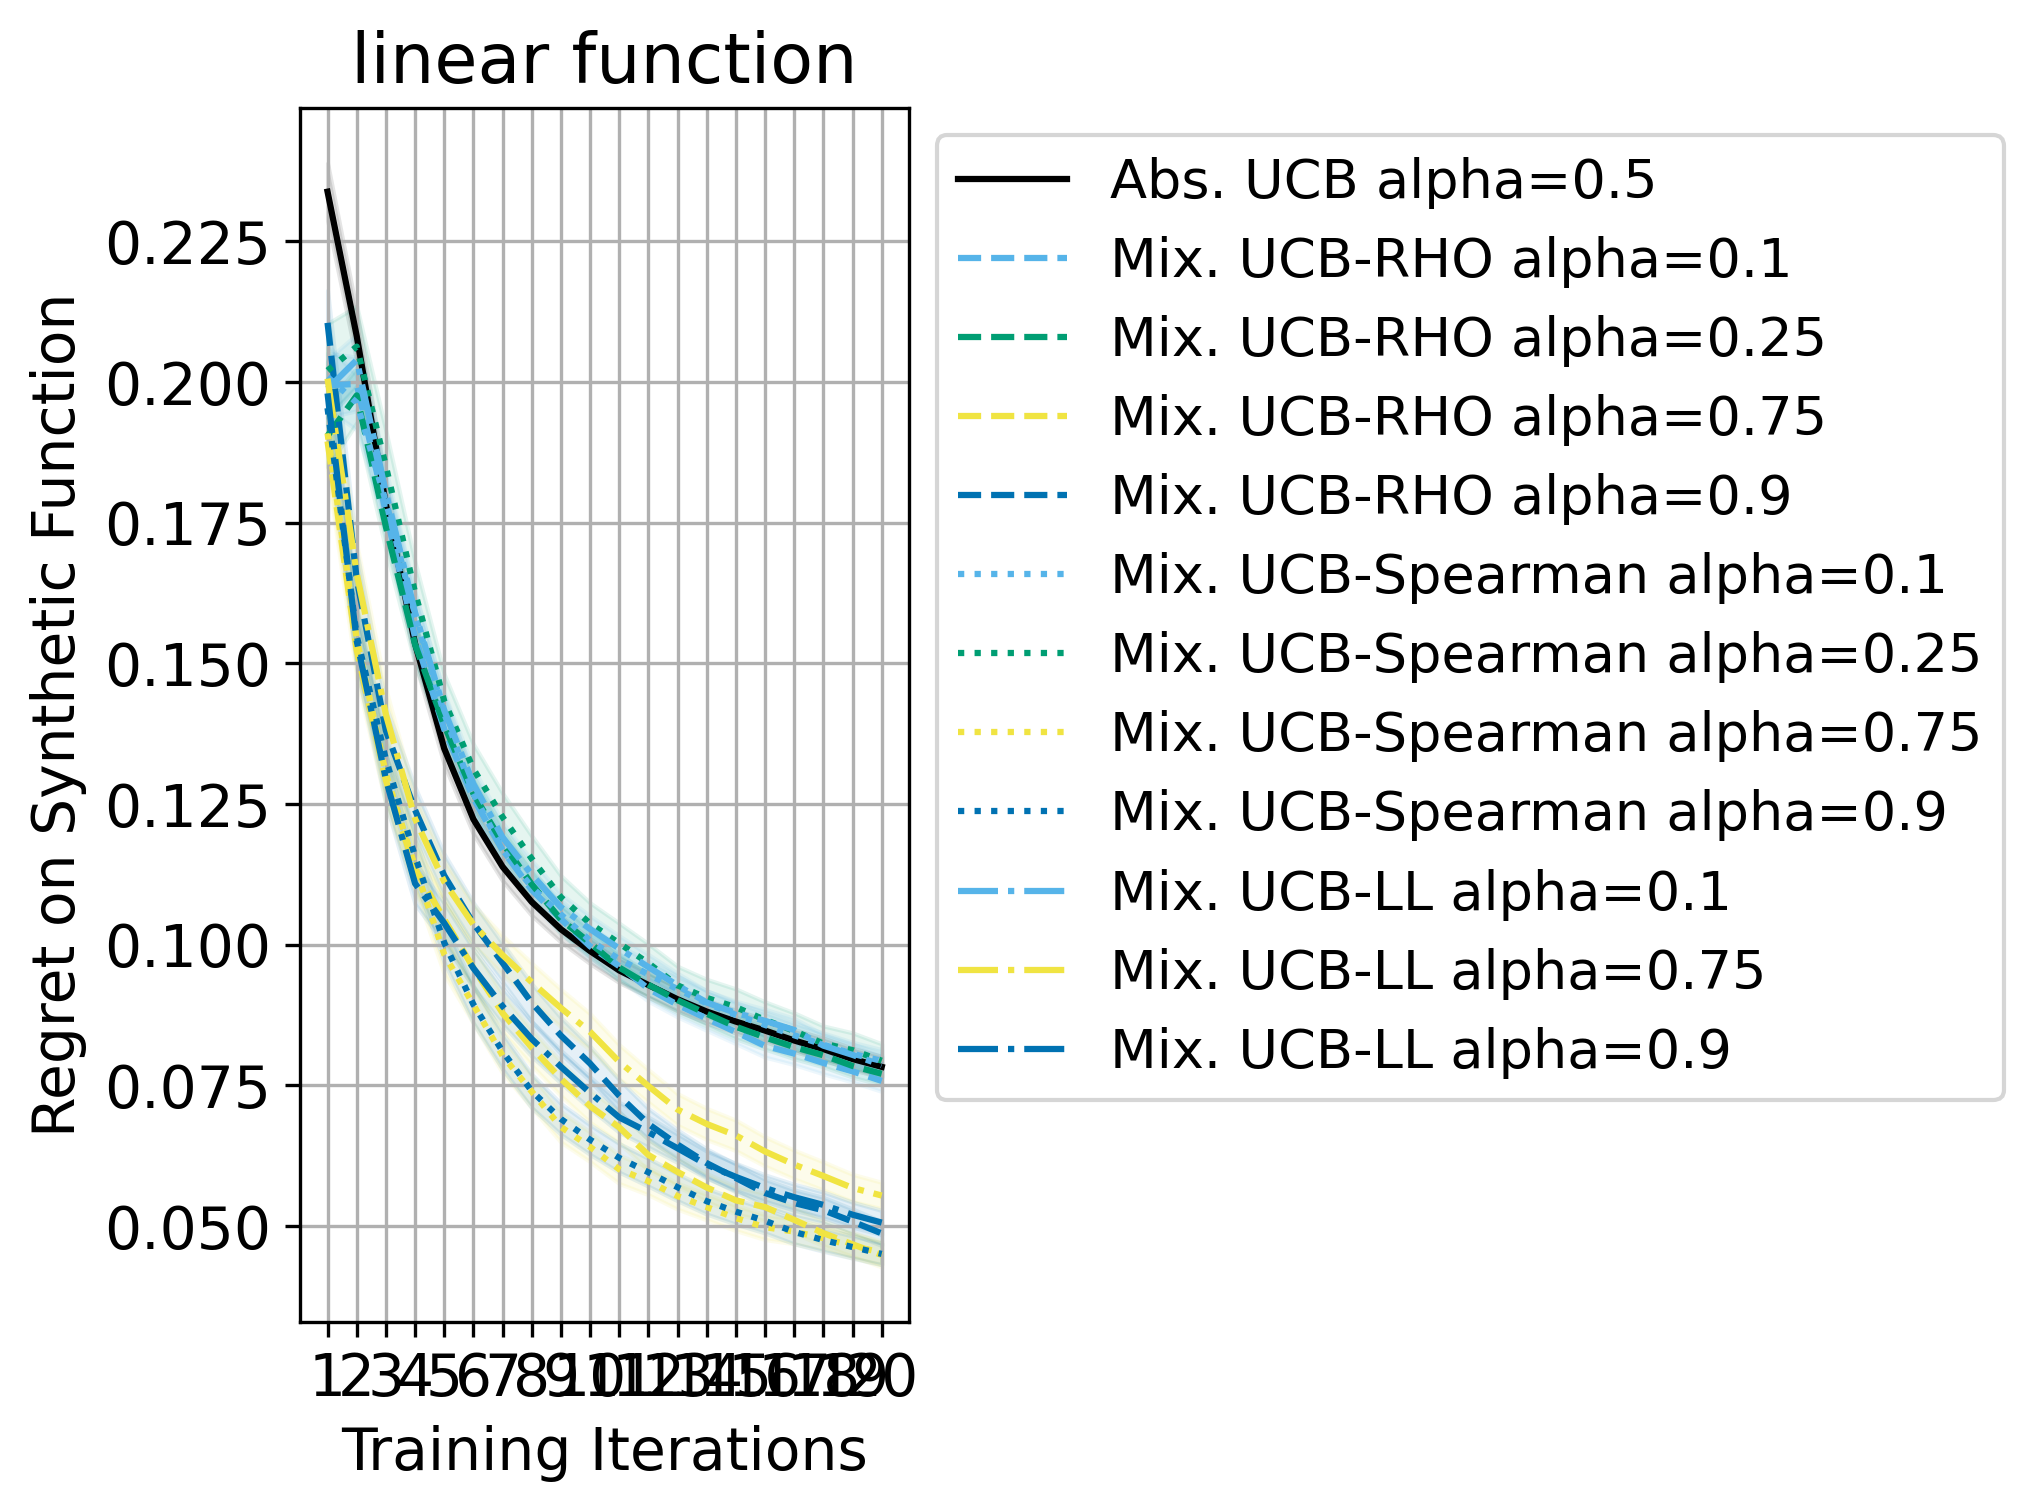

In [26]:

def selector_plot(selectors, show_avg_sel=False, fake_funcs=['min']):
    user_types = ['human_choice']
    after_time = '2024-10-04_14-00-00'
    before_time = '2025-09-24_17-00-00'


    pareto='False'

    models = ['gp']
    user = 'human_choice'
    select = 'switch'
    hypers = ['no']
    #hyper = hypers[0]

    plot_data = []

    plt.rc('font', size=14)
    plt.rc('ytick', labelsize=14)
    plt.rc('xtick', labelsize=14)


    linestyles=['-','--',':','-.']


    color_idx = 0
    line_style_idx = 0

    leg_txt = []

    show_avg_sel = show_avg_sel

    query_sizes = ['2']
    #vs=['50000.0', '2000.0', '60.0', '10.0']
    vs=['60.0']
    sigpairs=['0.1', '0.01']
    sigpairs = ['0.1']
    sigabss=['1.0']
    rbfls = ['1.2']

    rbfsigs = ['1.0']
    kmeds = ['medrand']

    ppair_str = '0.95'
    pabs_str = '0.95'

    alphas = ['0.01', '0.1', '0.25', '0.5', '0.75', '0.9', '0.99']
    fake_alphas = ['0.5']
    

    ax = plt.gca()
    if show_avg_sel:
        ax2 = ax.twinx()

    for j, fake_func in enumerate(fake_funcs):
        line_style_idx = 0
        for i, selector in enumerate(selectors):
            for l, hyper in enumerate(hypers):
                for k, model in enumerate(models):
                    for m, v in enumerate(vs):
                        for n, sigpair in enumerate(sigpairs):
                            for o, sigabs in enumerate(sigabss):
                                for rbfl in rbfls:
                                    for rbfsig in rbfsigs:
                                        for query_size in query_sizes:
                                            for kmed in kmeds:
                                                for alpha in alphas:
                                                    for fake_alpha in fake_alphas:
                                                        kmed_str = '_kmed_'+str(kmed)
                                                        if selector == 'ABS_RANDOM':
                                                            glob_selector = 'RANDOM'
                                                            select = 'rating'
                                                        elif selector == 'ABS_UCB':
                                                            glob_selector = 'UCB'
                                                            select = 'rating'
        #                                                 elif selector == 'ABS_ACQ_SPEAR':
        #                                                     glob_selector = selector
        #                                                     select = 'rating'
                                                        else:
                                                            glob_selector = selector
                                                            select = 'switch'

                                                        
                                                        sub_str_alpha = '_falp_' + fake_alpha +'_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair+ '_alpha_' + alpha
                                                        if (selector in ['ABS_UCB', 'ACQ_SPEAR']) and alpha == '0.5':
                                                            sub_str_alpha = '_'+hyper+'_v_'+v+'_sigabs_'+sigabs+'_sigpair_'+sigpair
                                
                                                        glob_check = directory+'AT_'+glob_selector+'_model_'+model+'_'+select+'_user_'+user+query_size+'_fake_'+fake_func+'_pareto_'+pareto+kmed_str+'_ppair_' + ppair_str + '_pabs_'+ pabs_str + sub_str_alpha +'_rbfl_'+rbfl+'_rbfsig_'+rbfsig+'_env*/train_data.npz'

                                                        print('\t'+glob_check)
                                                        files = glob(glob_check)
                                                        files = filter_by_time(files, before=before_time, after=after_time)

                                                        if len(files) > 0:
                                                            score_diffs = np.empty((0,21))
                                                            avg_selections = np.empty((0, 21))
                                                            for file in files:
                                                                data_file = np.load(file)
                                                                print(file)

                                                                # read in score diff
                                                                score_diff = np.mean(data_file['score_diff'], axis=(2,))

                                                                score_diffs = np.append(score_diffs, score_diff, axis=0)

                                                                if 'query_type_is_abs' in data_file:
                                                                    avg_selection = data_file['query_type_is_abs']
                                                                    avg_selections = np.append(avg_selections, avg_selection, axis=0)

                                                            print(score_diffs.shape)

                                                            itr_to_show = 21

                                                            mean_diffs = np.mean(score_diffs, axis=0)
                                                            std_diffs = np.std(score_diffs, axis=0)
                                                            print('standard diffs shape: '+ str(score_diffs.shape))
                                                            std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                                                            print(mean_diffs.shape)

                                                            if 'query_type_is_abs' in data_file:
                                                                mean_sels = np.mean(avg_selections, axis=0)
                                                                std_sels = np.std(avg_selections, axis=0)
                                                                std_error_mean_sels = std_sels / np.sqrt(avg_selections.shape[0])

                                                            x = np.arange(1,itr_to_show)

                                                            sigma_to_plot = 1.0

                                                            # get colors
                                                            c1 = alpha_color_dict[alpha]
                                                            s1 = sel_style_dict[selector]#pap_style_sel[selector]
                                                            c2 = c1#colors_dict[selector]
                                                            s2 = s1#'-.'



                                                            ax.fill_between(x, \
                                                                                    mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                                    mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                                                                    color=c1, \
                                                                                    alpha=0.1, \
                                                                                    label='_nolegend_')
                                                            ax.plot(x, mean_diffs[1:itr_to_show], color=c1, linestyle=s1)

                                                            if 'query_type_is_abs' in data_file and show_avg_sel:
            #                                                     ax2.fill_between(x, \
            #                                                                             mean_sels[1:itr_to_show]-(sigma_to_plot*std_error_mean_sels[1:itr_to_show]), \
            #                                                                             mean_sels[1:itr_to_show]+(sigma_to_plot*std_error_mean_sels[1:itr_to_show]), \
            #                                                                             color=c1, \
            #                                                                             alpha=0.1, \
            #                                                                             label='_nolegend_')
                                                                ax2.plot(x, mean_sels[1:itr_to_show], color=c2, linestyle=s2, label='_nolegend_')
                                                                ax2.set_ylabel('Selecting pair or abs abs=1, pair=0')

                                                            selector_text = selector_text_f(selector) + ' alpha='+str(alpha)
                                                            leg = selector_text
                                                            leg_txt.append(leg)

                                                            color_idx += 1
                                                            line_style_idx += 1





    print(leg_txt)
    ax.legend(leg_txt, bbox_to_anchor=(1.0, 1.0), prop={'size': 13})

    plt.xlabel('Training Iterations')
    ax.set_ylabel('Regret on Synthetic Function')
    #plt.title('Regret on geologist domain (GP model)')
    plt.xticks(range(1,21))

    plt.grid()

    plt.tight_layout()
    

##### Generate all of the figures

figsize=(7,5)
dpi=300

plt.figure(figsize=figsize, dpi=dpi)
selector_plot(['ABS_UCB', 'SW_UCB_RHO', 'SW_UCB_SPEAR', 'SW_UCB_LL'], False, ['min'])
plt.title('Min function')

plt.figure(figsize=figsize, dpi=dpi)
selector_plot(['ABS_UCB', 'SW_UCB_SPEAR', 'ACQ_SPEAR'], True, ['min'])
plt.title('Min function')

plt.figure(figsize=figsize, dpi=dpi)
selector_plot(['ABS_UCB', 'SW_UCB_RHO', 'ACQ_SPEAR'], True, ['logistic'])
plt.title('Logistic function')

plt.figure(figsize=figsize, dpi=dpi)
selector_plot(['ABS_UCB', 'SW_UCB_RHO', 'SW_UCB_SPEAR', 'SW_UCB_LL'], False, ['logistic'])
plt.title('Logistic function')

plt.figure(figsize=figsize, dpi=dpi)
selector_plot(['ABS_UCB', 'SW_UCB_SPEAR', 'ACQ_SPEAR'], True, ['linear'])
plt.title('linear function')

plt.figure(figsize=figsize, dpi=dpi)
selector_plot(['ABS_UCB', 'SW_UCB_RHO', 'SW_UCB_SPEAR', 'SW_UCB_LL'], False, ['linear'])
plt.title('linear function')

plt.show()